# Problem Statement

A client is exploring the feasibility of expanding their business into short-term rental cycles in London. To support their decision-making, they require insights into existing cycling usage patterns to understand demand, customer behavior, and operational challenges. Specifically, they are interested in:

1.   Customer segmentation
2.   Expected usage trends
3.   Operational concerns such as reliability and supply chain management

By analyzing Transport for London (TFL) cycling data (2021-2023), I aim to derive actionable insights that will help the client design an effective strategy for their expansion.

# Data Acquisition and Preprocessing Approach

### Data Collection

*   Initially, an attempt was made to access the Transport for London (TFL) cycling data via API to streamline the data ingestion process. However, due to API inconsistencies and accessibility issues, the files were manually downloaded and organized year-wise to efficiently manage high-memory usage.

### Data Quality Challenges

During the preliminary data inspection, several inconsistencies were identified:



*   Schema Variability: The 2022 dataset exhibited discrepancies in column names, as the initial months followed a different naming convention compared to later months. These inconsistencies persisted in the 2023 data, requiring manual standardization.

*   Data Corruption: Certain records had misaligned values, where data points appeared under incorrect features. This issue was more pronounced in the 2022 dataset due to changes in data collection methodology.
*   Inconsistent Data Types: Multiple columns contained mixed data types (e.g., strings and numerical values within the same column), which could impact downstream data processing and model performance.


*   Missing Values: Several attributes contained null or missing values, requiring appropriate handling strategies.

### Data Cleaning and Standardization

To ensure consistency across datasets, the following preprocessing steps were applied:


1.   Feature Name Standardization:

*   Column names were aligned with the 2021 dataset to maintain uniformity across all years.

2.   Data Type Optimization:
*   Converted numerical columns to appropriate integer/float formats to reduce memory footprint.
*   Standardized categorical variables to ensure consistent encoding.

3.   Handling Mixed Data Types:
*   Columns with multiple data types were transformed into a single, uniform format to facilitate efficient analysis and model training.

4.   Missing Value Treatment:
*   Used imputation techniques where applicable.
Dropped non-essential records if missing data exceeded a reasonable threshold.


### Data Storage and Accessibility

The cleaned and preprocessed datasets were stored in Google Drive, ensuring efficient access for further analysis while optimizing memory management. This structured storage approach allows for seamless integration with subsequent data science tasks, including exploratory analysis, modeling, and visualization.


This systematic approach ensures data integrity, consistency, and scalability, providing a strong foundation for insightful analysis and data-driven decision-making.

# Data Loading and Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os

folder_path = "/content/drive/My Drive/PwC_Data"  # Update with your folder path
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

print("Files Found:", file_list)

Files Found: ['/content/drive/My Drive/PwC_Data/cleaned_2021.csv', '/content/drive/My Drive/PwC_Data/cleaned_2022_06.csv', '/content/drive/My Drive/PwC_Data/Cleaned_12_01.csv', '/content/drive/My Drive/PwC_Data/Cleaned_12_02.csv', '/content/drive/My Drive/PwC_Data/Cleaned_2023.csv']


In [ ]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install fastparquet


In [4]:
import os
import pandas as pd

output_folder = "/content/drive/My Drive/PwC_Data/processed_parquet"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

chunk_size = 500000  # Process 500,000 rows at a time

for file in file_list:
    print(f"Processing {file} ...")

    chunk_iter = pd.read_csv(file, chunksize=chunk_size, low_memory=False)

    for i, chunk in enumerate(chunk_iter):
        output_file = os.path.join(output_folder, f"processed_{os.path.basename(file).replace('.csv', '')}_chunk_{i}.parquet")

        # Optimize Data Types
        for col in chunk.select_dtypes(include=['float64']).columns:
            chunk[col] = chunk[col].astype('float32')  # Reduce memory

        for col in chunk.select_dtypes(include=['int64']).columns:
            chunk[col] = chunk[col].astype('int32')  # Reduce memory

        # Save each chunk separately
        chunk.to_parquet(output_file, index=False, compression='snappy', engine='fastparquet')

        print(f"✅ Saved {output_file}")

print("✅ Data Processing Completed. Saved to Parquet.")


Processing /content/drive/My Drive/PwC_Data/cleaned_2021.csv ...
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_0.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_1.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_2.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_3.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_4.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_5.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_6.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_7.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_parquet/processed_cleaned_2021_chunk_8.parquet
✅ Saved /content/drive/My Drive/PwC_Data/processed_pa

In [5]:
import glob

# Get all processed parquet files
parquet_files = glob.glob(os.path.join(output_folder, "*.parquet"))

# Load and concatenate all parquet files
df_list = [pd.read_parquet(f) for f in parquet_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Save the merged file
final_output_file = os.path.join(output_folder, "final_merged.parquet")
merged_df.to_parquet(final_output_file, index=False, compression='snappy')

print(f"✅ All chunks merged and saved to {final_output_file}")


✅ All chunks merged and saved to /content/drive/My Drive/PwC_Data/processed_parquet/final_merged.parquet


In [6]:
df = pd.read_parquet(final_output_file)



In [7]:
print(df.info())  # Check data types and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49700450 entries, 0 to 49700449
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Rental Id          int32  
 1   Duration           int32  
 2   Bike Id            int32  
 3   End Date           object 
 4   EndStation Id      float64
 5   EndStation Name    object 
 6   Start Date         object 
 7   StartStation Id    int32  
 8   StartStation Name  object 
dtypes: float64(1), int32(4), object(4)
memory usage: 2.6+ GB
None


In [8]:
print(df.head())  # Preview first few rows

   Rental Id  Duration  Bike Id             End Date  EndStation Id  \
0  109440029       900    17160  2021-06-25 21:18:00          774.0   
1  109416648      2400     9025  2021-06-25 13:37:00          658.0   
2  109387761      1680    18894  2021-06-24 17:37:00          340.0   
3  109399251      1440    19809  2021-06-24 20:58:00          186.0   
4  109415671       600    14583  2021-06-25 12:37:00          307.0   

                       EndStation Name           Start Date  StartStation Id  \
0       Hurlingham Park, Parsons Green  2021-06-25 21:03:00              658   
1    Ethelburga Estate, Battersea Park  2021-06-25 12:57:00              774   
2         Bank of England Museum, Bank  2021-06-24 17:09:00              186   
3         South Wharf Road, Paddington  2021-06-24 20:34:00              427   
4  Black Lion Gate, Kensington Gardens  2021-06-25 12:27:00              300   

                   StartStation Name  
0  Ethelburga Estate, Battersea Park  
1     Hurlingh

In [9]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,109440029,900,17160,2021-06-25 21:18:00,774.0,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park"
1,109416648,2400,9025,2021-06-25 13:37:00,658.0,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green"
2,109387761,1680,18894,2021-06-24 17:37:00,340.0,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington"
3,109399251,1440,19809,2021-06-24 20:58:00,186.0,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank"
4,109415671,600,14583,2021-06-25 12:37:00,307.0,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park"


In [10]:
df.dtypes

,0
Rental Id,int32
Duration,int32
Bike Id,int32
End Date,object
EndStation Id,float64
EndStation Name,object
Start Date,object
StartStation Id,int32
StartStation Name,object


In [11]:
missing_values = df.isnull().sum()

In [12]:
print(missing_values)

Rental Id                 0
Duration                  0
Bike Id                   0
End Date                  0
EndStation Id        624288
EndStation Name           0
Start Date                0
StartStation Id           0
StartStation Name         0
dtype: int64


In [13]:
missing_endstation_rows = df[df["EndStation Id"].isnull()]
print(missing_endstation_rows)


          Rental Id  Duration  Bike Id             End Date  EndStation Id  \
12857603  122342973       180    16835  2022-07-06 15:26:00            NaN   
12857604  122443043      1380     8260  2022-07-08 18:09:00            NaN   
12857605  122392666       600    17431  2022-07-07 17:00:00            NaN   
12857606  122516692       900       39  2022-07-10 11:47:00            NaN   
12857607  122561553      1140     6484  2022-07-11 09:55:00            NaN   
...             ...       ...      ...                  ...            ...   
38019967  122470725      1740     6820  2022-07-09 12:31:00            NaN   
38019968  122485029     19260     4858  2022-07-09 21:21:00            NaN   
38019969  122548002      1500    21456  2022-07-10 21:36:00            NaN   
38019970  122584958      7740    20054  2022-07-11 20:58:00            NaN   
38019971  122498326      6000    13179  2022-07-09 21:28:00            NaN   

                                 EndStation Name           Star

In [14]:
total_rows = len(df)
missing_count = df["EndStation Id"].isnull().sum()
missing_percentage = (missing_count / total_rows) * 100

print(f"Missing EndStation Id: {missing_count} rows")
print(f"Percentage Missing: {missing_percentage:.2f}%")


Missing EndStation Id: 624288 rows
Percentage Missing: 1.26%


In [15]:
df = df.dropna(subset=["EndStation Id"])
print(f"New DataFrame Shape: {df.shape}")  # Verify the new size


New DataFrame Shape: (49076162, 9)


In [16]:
df.dtypes

,0
Rental Id,int32
Duration,int32
Bike Id,int32
End Date,object
EndStation Id,float64
EndStation Name,object
Start Date,object
StartStation Id,int32
StartStation Name,object


In [17]:
df["EndStation Id"] = df["EndStation Id"].astype("int16")
df["Rental Id"] = df["Rental Id"].astype("int16")
df["Duration"] = df["Duration"].astype("int16")
df["Bike Id"] = df["Bike Id"].astype("int16")
df["StartStation Id"] = df["StartStation Id"].astype("int16")

<ipython-input-17-a0f089bbaf6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EndStation Id"] = df["EndStation Id"].astype("int16")


In [18]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park"
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green"
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington"
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank"
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park"


In [19]:
df.drop_duplicates()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park"
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green"
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington"
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank"
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park"
...,...,...,...,...,...,...,...,...,...
24850220,-16275,1025,-13779,2023-08-01 00:18:00,1210,"Nevern Place, Earl's Court",2023-08-01 00:01:00,-27478,"Kings Gate House, Westminster"
24850221,-16274,436,-12112,2023-08-01 00:09:00,1093,"Kennington Cross, Kennington",2023-08-01 00:01:00,1154,"Kennington Road , Vauxhall"
24850222,-16283,1006,23715,2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall"
24850223,-16282,1007,-24269,2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall"


In [20]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park"
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green"
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington"
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank"
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park"


In [21]:
df.shape

(49076162, 9)

In [22]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Print duplicate rows
print(duplicates)

          Rental Id  Duration  Bike Id             End Date  EndStation Id  \
13739228      12263       660    21856  2022-08-24 18:19:00            449   
13739229     -27817       840    10849  2022-08-25 17:19:00            449   
13739230      20546      1020    20939  2022-08-30 16:20:00            449   
13739231       7795      1140    14917  2022-08-30 09:00:00            229   
13739232     -11732       900    18477  2022-08-24 08:40:00            175   
...             ...       ...      ...                  ...            ...   
49700445     -16275      1025   -13779  2023-08-01 00:18:00           1210   
49700446     -16274       436   -12112  2023-08-01 00:09:00           1093   
49700447     -16283      1006    23715  2023-08-01 00:17:00           1059   
49700448     -16282      1007   -24269  2023-08-01 00:17:00           1059   
49700449     -16281       666   -12356  2023-08-01 00:11:00           3500   

                       EndStation Name           Start Date  St

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(24291631, 9)

In [25]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park"
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green"
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington"
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank"
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park"


In [26]:
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["End Date"] = pd.to_datetime(df["End Date"])


In [27]:
df.dtypes

,0
Rental Id,int16
Duration,int16
Bike Id,int16
End Date,datetime64[ns]
EndStation Id,int16
EndStation Name,object
Start Date,datetime64[ns]
StartStation Id,int16
StartStation Name,object


In [28]:
df["Start_Date"] = df["Start Date"].dt.date  # Keep only the date
df["Hour"] = df["Start Date"].dt.hour  # Extract hour


In [29]:
# Add Temporal Features
df["Year"] = df["Start Date"].dt.year
df["Month"] = df["Start Date"].dt.month
df["Day"] = df["Start Date"].dt.day
df["Weekday"] = df["Start Date"].dt.weekday

In [30]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Start_Date,Hour,Year,Month,Day,Weekday
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park",2021-06-25,21,2021,6,25,4
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green",2021-06-25,12,2021,6,25,4
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington",2021-06-24,17,2021,6,24,3
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank",2021-06-24,20,2021,6,24,3
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park",2021-06-25,12,2021,6,25,4


In [31]:
bike_demand = df.groupby(["StartStation Id", "Start_Date"])["Rental Id"].count().reset_index()
bike_demand.rename(columns={"Rental Id": "Bike Demand"}, inplace=True)


In [32]:
df = df.merge(bike_demand, on=["StartStation Id", "Start_Date"], how="left")


In [33]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Start_Date,Hour,Year,Month,Day,Weekday,Bike Demand
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park",2021-06-25,21,2021,6,25,4,92
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green",2021-06-25,12,2021,6,25,4,26
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington",2021-06-24,17,2021,6,24,3,95
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank",2021-06-24,20,2021,6,24,3,137
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park",2021-06-25,12,2021,6,25,4,175


In [34]:
df.describe()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand
count,2.429163e+07,2.429163e+07,2.429163e+07,24291631,2.429163e+07,24291631,2.429163e+07,2.429163e+07,2.429163e+07,2.429163e+07,2.429163e+07,2.429163e+07,2.429163e+07
mean,4.743108e+00,1.064380e+03,5.526685e+03,2022-06-20 09:06:34.828661760,-6.838054e+02,2022-06-20 08:43:26.186099456,-6.947401e+02,1.396093e+01,2.021905e+03,7.265415e+00,1.580550e+01,2.954891e+00,5.996905e+01
min,-3.276800e+04,-3.274800e+04,-3.108200e+04,2020-12-30 00:07:00,-2.944400e+04,2020-12-30 00:01:00,-2.944400e+04,0.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,-1.637800e+04,4.800000e+02,-8.091000e+03,2021-08-07 17:21:00,2.290000e+02,2021-08-07 16:56:00,2.290000e+02,1.000000e+01,2.021000e+03,5.000000e+00,8.000000e+00,1.000000e+00,3.000000e+01
50%,8.000000e+00,8.350000e+02,9.994000e+03,2022-08-07 16:16:00,6.340000e+02,2022-08-07 15:47:00,6.320000e+02,1.500000e+01,2.022000e+03,8.000000e+00,1.600000e+01,3.000000e+00,4.700000e+01
75%,1.638400e+04,1.308000e+03,1.807900e+04,2023-04-30 12:41:00,1.142000e+03,2023-04-30 12:08:00,1.145000e+03,1.800000e+01,2.023000e+03,1.000000e+01,2.300000e+01,5.000000e+00,7.100000e+01
max,3.276700e+04,3.276000e+04,3.113800e+04,2024-04-17 09:22:00,2.218300e+04,2023-12-31 23:59:00,2.218300e+04,2.300000e+01,2.023000e+03,1.200000e+01,3.100000e+01,6.000000e+00,7.730000e+02
std,1.891730e+04,1.309240e+03,1.408337e+04,NaN,8.013628e+03,NaN,8.026589e+03,4.978918e+00,8.887204e-01,3.013843e+00,8.854971e+00,1.950920e+00,5.311307e+01


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24291631 entries, 0 to 24291630
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Rental Id          int16         
 1   Duration           int16         
 2   Bike Id            int16         
 3   End Date           datetime64[ns]
 4   EndStation Id      int16         
 5   EndStation Name    object        
 6   Start Date         datetime64[ns]
 7   StartStation Id    int16         
 8   StartStation Name  object        
 9   Start_Date         object        
 10  Hour               int32         
 11  Year               int32         
 12  Month              int32         
 13  Day                int32         
 14  Weekday            int32         
 15  Bike Demand        int64         
dtypes: datetime64[ns](2), int16(5), int32(5), int64(1), object(3)
memory usage: 1.8+ GB


# Exploratory Data Analysis

### Aggregate Bike Demand Over Time

In [36]:


# Aggregate demand per day
bike_demand_over_time = df.groupby("Start_Date")["Bike Demand"].sum().reset_index()
bike_demand_over_time["Start_Date"] = pd.to_datetime(bike_demand_over_time["Start_Date"])

# Sort by date
bike_demand_over_time = bike_demand_over_time.sort_values("Start_Date")


### Daily Rental Trends

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


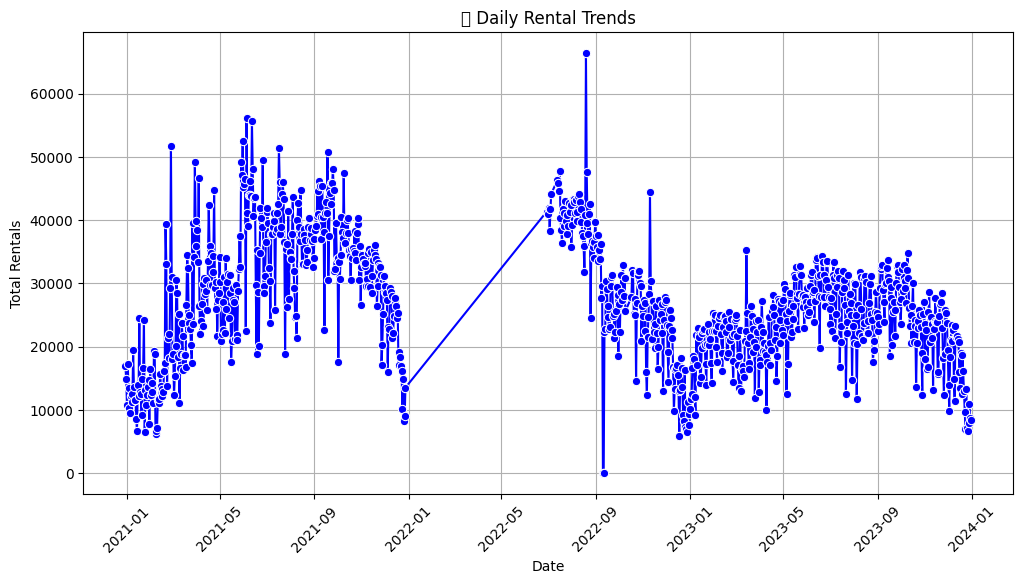

In [38]:


# Aggregate daily rentals
daily_rentals = df.groupby("Start_Date")["Rental Id"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_rentals, x="Start_Date", y="Rental Id", marker="o", color="b")

plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily Rental Trends")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()



## Insights from the Daily Rental Trends Chart

### Seasonal Patterns

The chart shows clear peaks during warmer months (spring & summer) and dips during colder months (fall & winter).
This suggests higher demand for bike rentals in favorable weather conditions, which aligns with expected seasonal effects.

### Sharp Drop and Recovery (Early 2022)

A significant drop in early 2022 followed by a sudden spike indicates a possible data gap, system outage, or external disruption (e.g., COVID-19 restrictions, maintenance, or weather-related factors).
This needs further investigation to determine operational causes.

### Steady Growth and Fluctuations

The general trend follows a cyclical pattern, with peaks and troughs repeating yearly.
There is also short-term volatility within seasons, possibly due to weekend effects, weather fluctuations, or local events.

How This Helps the Project:

1. Demand Forecasting : Understanding seasonal trends helps in staffing, fleet allocation, and pricing strategies.
2. Business Strategy : Can adjust marketing efforts to increase off-season rentals (e.g., discounts, promotions).
3. Operational Planning : Helps in optimizing bike maintenance schedules to ensure availability during peak seasons.


### Hourly Rental Trends

<ipython-input-41-3c74b65310ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_rentals, x="Hour", y="Rental Id", palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


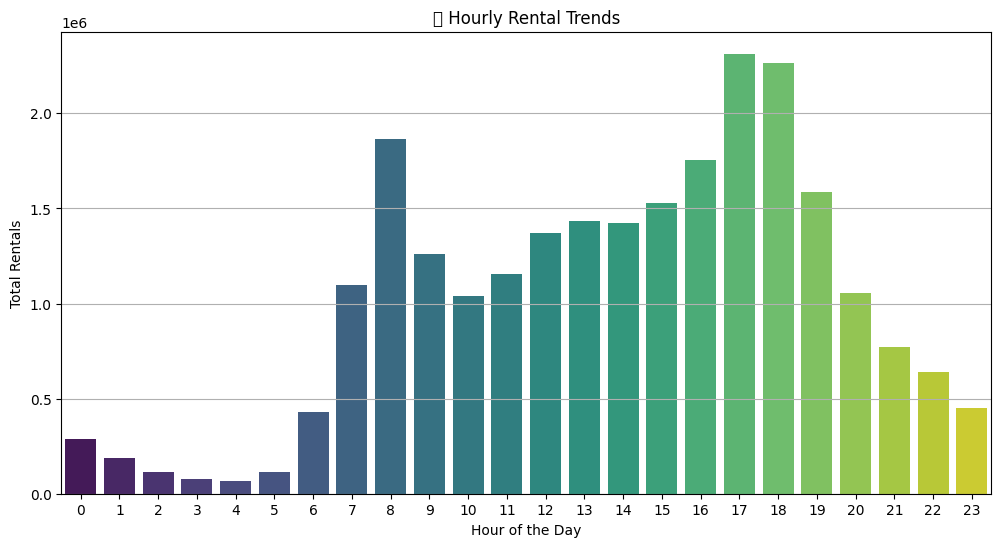

In [41]:


# Aggregate rentals by hour
hourly_rentals = df.groupby("Hour")["Rental Id"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_rentals, x="Hour", y="Rental Id", palette="viridis")

plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.title("Hourly Rental Trends")
plt.grid(axis="y")

plt.show()


## Insights from the Hourly Rental Trends Chart

### Peak Hours (Morning & Evening)

1. Morning Spike (8 AM): A significant surge in rentals suggests high demand during the morning commute, likely due to people traveling to work or school.

2. Evening Peak (5-7 PM): Another sharp rise occurs in the late afternoon, aligning with end-of-workday commutes.

3. Lower Demand Overnight (12 AM - 5 AM):
Rentals drop significantly between midnight and early morning, which aligns with reduced mobility and business activity during these hours.

4. Steady Growth in Afternoon Rentals:
A gradual increase from 10 AM to 4 PM suggests moderate usage throughout the day, potentially driven by leisure riders, tourists, or flexible work schedules.

### Actionable Strategies
1. Fleet Management – Ensuring bike availability during peak commuting hours.
2. Pricing Strategy – Implementing dynamic pricing (e.g., higher rates during peak hours) to maximize revenue.
3. Maintenance Scheduling – Conducting bike maintenance during low-demand hours (midnight - 5 AM) to minimize disruption.
4. Expansion Planning – Identifying opportunities for bike station placement near major work hubs, transit stations, and high-traffic areas

### Most popular Start Station

<ipython-input-42-105ec38863bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stations.index, x=top_stations.values, palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128655 (\N{BUS STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


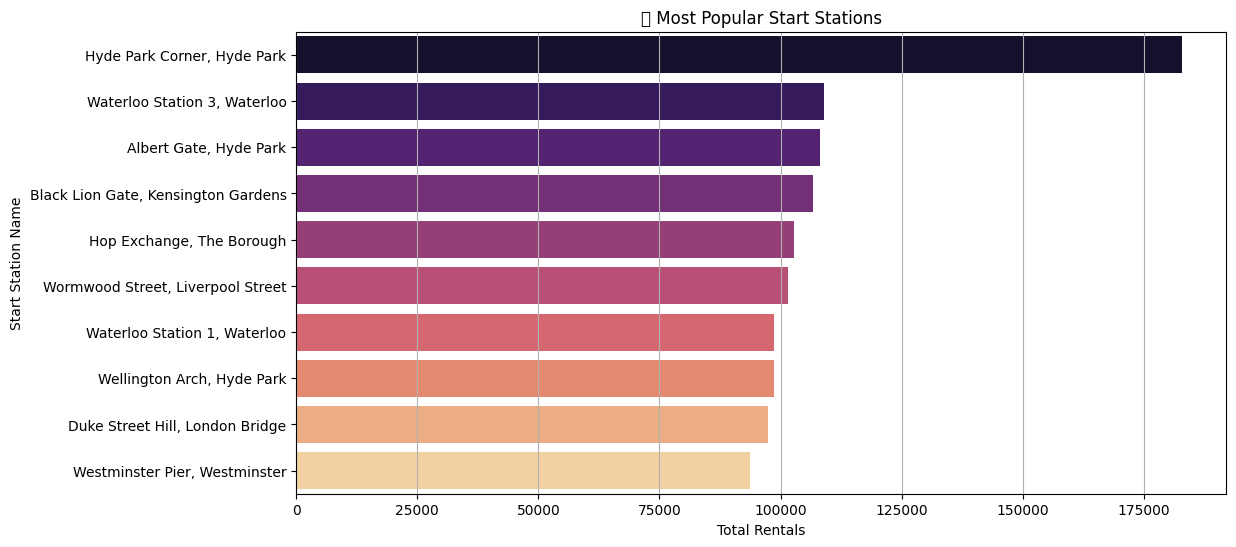

In [42]:


# Top 10 most popular start stations
top_stations = df["StartStation Name"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_stations.index, x=top_stations.values, palette="magma")

plt.xlabel("Total Rentals")
plt.ylabel("Start Station Name")
plt.title("Most Popular Start Stations")
plt.grid(axis="x")

plt.show()


## Insights from the Most Popular Start Stations Chart

### Top Locations for Bike Rentals
1. Hyde Park Corner, Hyde Park is the most frequently used starting station, likely due to tourist attractions and leisure riders.
2. Waterloo Station (Multiple Entries) ranks high, indicating a strong commuter demand from one of London's busiest train stations.
3. Other popular locations include Albert Gate (Hyde Park), Black Lion Gate (Kensington Gardens), and Westminster Pier, highlighting high usage near parks and landmarks.

### Key Trends Observed
1. Tourism & Recreation Hotspots: Hyde Park and Westminster Pier suggest high rentals for leisure and sightseeing.
2. Commuter Hubs: Waterloo Station, Liverpool Street, and London Bridge indicate significant use by daily commuters.

### Actionable Strategies
1. Strategic Station Expansion – Adding more docks near high-traffic areas.
2. Rebalancing Fleet Supply – Ensuring sufficient bikes at Hyde Park and Waterloo Station during peak hours.
3. Targeted Marketing – Promotions for tourists near parks and offices near commuter hubs.

### Most popular End Station

<ipython-input-43-cb2968081ed2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stations.index, x=top_stations.values, palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128655 (\N{BUS STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


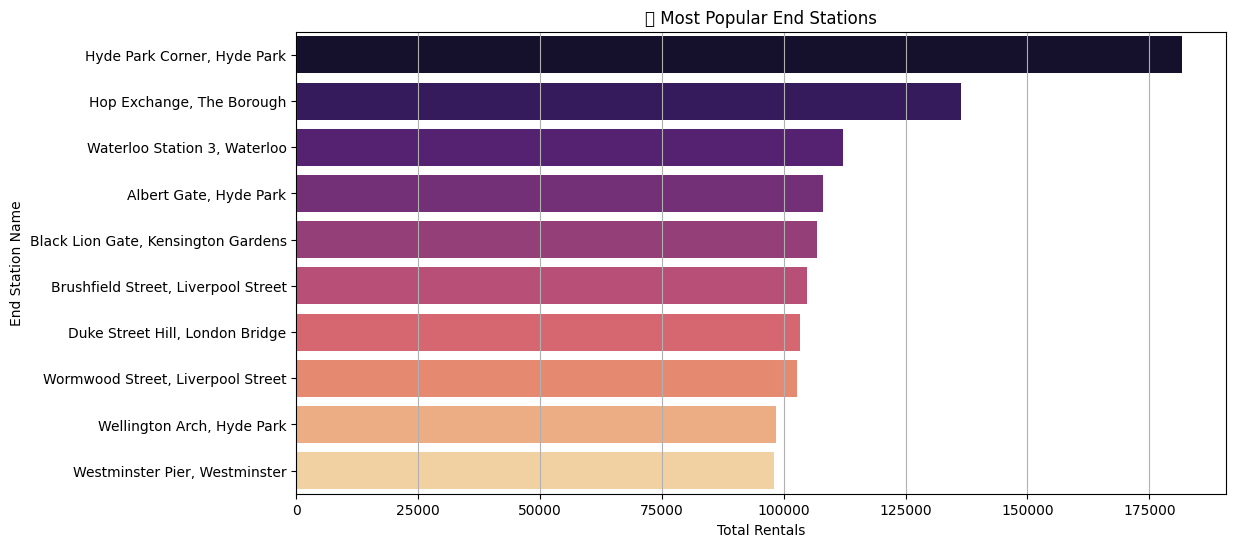

In [43]:


# Top 10 most popular start stations
top_stations = df["EndStation Name"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_stations.index, x=top_stations.values, palette="magma")

plt.xlabel("Total Rentals")
plt.ylabel("End Station Name")
plt.title("Most Popular End Stations")
plt.grid(axis="x")

plt.show()

## Insights from the Most Popular End Stations Chart

### Popular Drop-off Locations
1. Hyde Park Corner, Hyde Park is the most frequently used end station, similar to its rank as a start station.
2. Hop Exchange, The Borough emerges as a top end station, which wasn't as prominent in the start station chart—suggesting it is a common destination rather than a starting point.
3. Waterloo Station 3, Waterloo remains a top location, reinforcing its importance as a key transport hub.

### Key Observations 📊
1. Leisure & Tourism: Hyde Park, Kensington Gardens, and Westminster Pier are hotspots for tourists and recreational riders.
2. Commuter Traffic: Waterloo Station, Liverpool Street, and London Bridge are major transit points, reflecting high commuter usage.
3. Hop Exchange – A Unique Trend: This station ranks high for drop-offs but not as much for pickups, possibly due to business-related travel or evening entertainment zones.

### Actionable Strategies
1. Bike Redistribution Optimization – Ensure enough bikes are available at start-heavy locations and rebalanced at end-heavy stations.
2. New Station Planning – Identify gaps in underserved areas between these popular routes.
3. Commuter vs. Tourist Demand Segmentation – Differentiate marketing strategies based on weekday vs. weekend trends.

### Hourly Demand Trend (When Do People Rent Bikes?)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


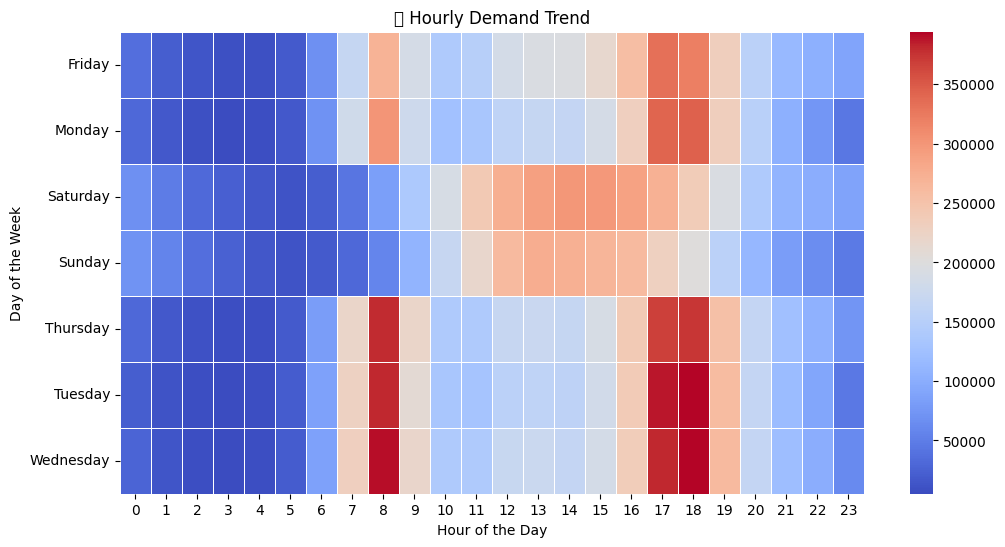

In [44]:



# Extract weekday
df["Weekday"] = df["Start Date"].dt.day_name()

# Pivot table for heatmap
hourly_heatmap = df.pivot_table(index="Weekday", columns="Hour", values="Rental Id", aggfunc="count")

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_heatmap, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Hourly Demand Trend")

plt.show()


## Hourly Demand Trend Insights

### Peak Hours

1. Weekdays:
Morning Rush (8-9 AM) → Strong demand, especially on Tuesdays & Thursdays.
Evening Rush (5-6 PM) → Second peak, likely commuters returning home.
2. Weekends:
More consistent midday usage (10 AM - 6 PM), with Saturdays showing higher demand than Sundays.

### Commuter vs. Leisure Patterns
1. Weekday patterns align with work commute habits → sharp spikes in morning/evening.
2. Weekends have a gradual, extended peak → bikes used more for leisure & recreation.

### Actionable Strategies
1. Rebalance bike supply – More bikes at start stations before peak hours.
2. Maintenance during off-peak hours – Early morning (12 AM - 5 AM) is best.
3. Weekend promotional offers – Encourage more rides in non-peak times.

### Weekday vs. Weekend Rentals

<ipython-input-45-29904ee43a4b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_rentals.index, y=weekend_rentals.values, palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


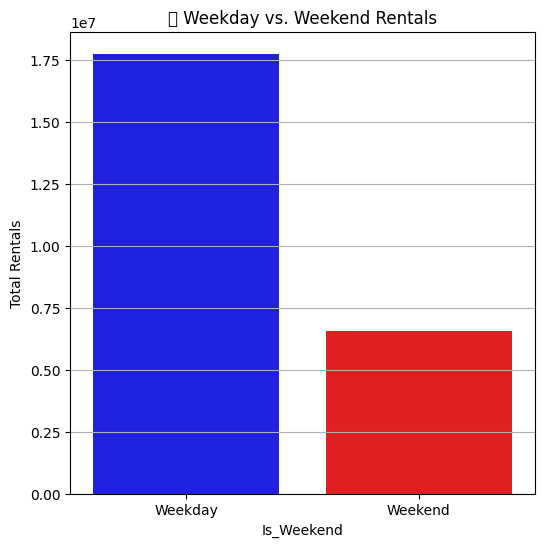

In [45]:


# Define weekdays & weekends
df["Is_Weekend"] = df["Weekday"].isin(["Saturday", "Sunday"])

weekend_rentals = df.groupby("Is_Weekend")["Rental Id"].count()

plt.figure(figsize=(6, 6))
sns.barplot(x=weekend_rentals.index, y=weekend_rentals.values, palette=["blue", "red"])

plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"])
plt.ylabel("Total Rentals")
plt.title("Weekday vs. Weekend Rentals")
plt.grid(axis="y")

plt.show()


## Weekday vs Weekend chart Insights

1. Higher Rentals on Weekdays:
Rentals are almost 2x higher on weekdays than weekends.
Likely driven by commuters (office workers, students).
2. Lower Rentals on Weekends:
Fewer people use rentals, possibly due to alternative transport or leisure preferences.

### Actionable Strategies:
1. Optimize weekdays: Ensure availability during peak hours, offer commuter discounts.
2. Boost weekends: Introduce leisure-based promotions, collaborate with tourism & fitness sectors.

###  Seasonal Trends (Does Weather Affect Bike Rentals?)

<ipython-input-46-b9e256ba97b8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


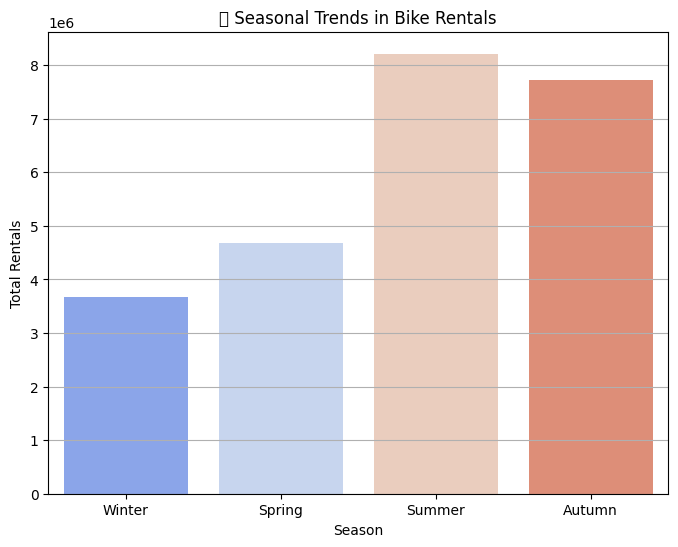

In [46]:


# Define seasons manually
df["Month"] = df["Start Date"].dt.month
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df["Season"] = df["Month"].map(season_map)

# Aggregate rentals per season
season_rentals = df.groupby("Season")["Rental Id"].count().reindex(["Winter", "Spring", "Summer", "Autumn"])

plt.figure(figsize=(8, 6))
sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="coolwarm")

plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Seasonal Trends in Bike Rentals")
plt.grid(axis="y")

plt.show()


## Seasonal Bike Rental Trends Insight

1. Peak Rentals in Summer & Autumn
Highest rentals occur in summer, followed closely by autumn.
Warm weather and outdoor-friendly conditions likely boost demand.
2. Lower Rentals in Winter
Winter has the lowest rentals, likely due to cold weather and unfavorable conditions.
Spring sees a moderate increase as temperatures improve.

### Actionable Strategies:
1. Increase bike availability in summer & autumn to meet high demand.
2. Winter strategies: Offer discounts, promote winter-friendly biking gear.
3. Spring marketing campaigns can help transition into peak months.

### Trip Duration vs Rentals

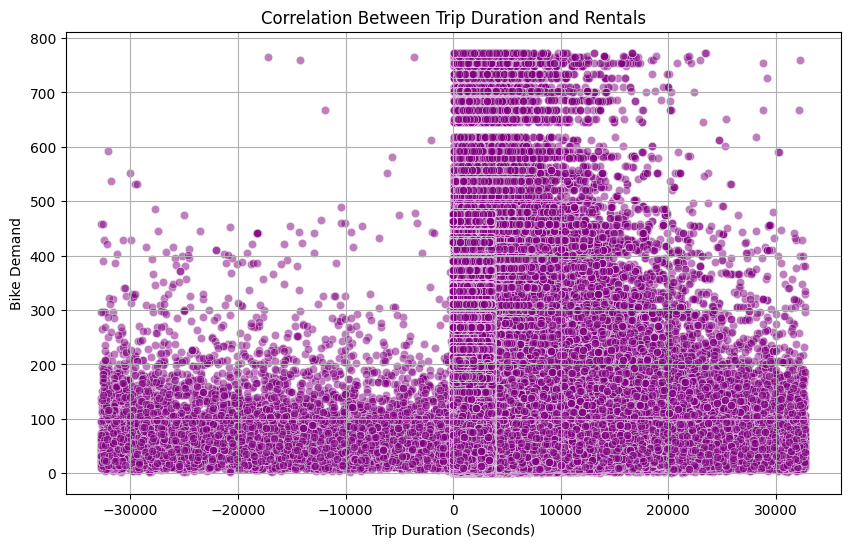

In [47]:
# Correlation Between Trip Duration and Rentals

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration", y="Bike Demand", alpha=0.5, color="purple")

plt.xlabel("Trip Duration (Seconds)")
plt.ylabel("Bike Demand")
plt.title("Correlation Between Trip Duration and Rentals")
plt.grid(True)

plt.show()


### Insights from Trip Duration vs. Bike Demand Scatter Plot

### Dense Cluster Around Short Durations
1. Most trips are short (~0 to 10,000 seconds or ~0 to 2.8 hours).
2. Suggests high demand for quick, short-distance rides.

### Longer Trips Are Less Frequent
1. Demand decreases as trip duration increases beyond 10,000 seconds.
2. Few users rent bikes for extended periods.

### Negative Values Issue
1. Presence of negative trip durations indicates possible data errors.
2. Could be due to incorrect time logging or preprocessing mistakes.

### Actionable Strategies:
1. Optimize pricing for short trips since they are the most common.
2. Investigate negative values and fix data inconsistencies.
3. Consider incentives for longer rides to balance demand.

### Trip Duration Analysis

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


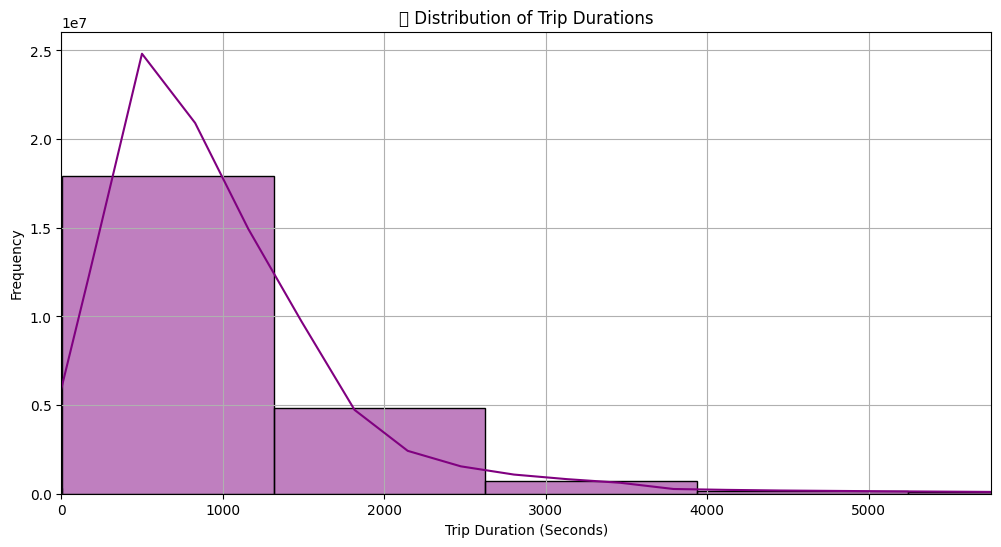

In [48]:


plt.figure(figsize=(12, 6))
sns.histplot(df["Duration"], bins=50, kde=True, color="purple")

plt.xlabel("Trip Duration (Seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.xlim(0, df["Duration"].quantile(0.99))  # Limit outliers
plt.grid(True)

plt.show()


## Insights from Trip Duration Distribution

### Right-Skewed Distribution

Most trips are short (0 - 16 minutes). Few trips exceed 33 minutes, indicating short-Duration rides dominate.

### Exponential Decay in Frequency
Sharp decline in trip counts as duration increases.
Common in ride-sharing, where short trips are more frequent than long ones.

### Outlier Handling with quantile(0.99)
Limiting x-axis at the 99th percentile helps exclude extreme values.
This prevents misleading long-duration trips from skewing the analysis.

### Actionable Strategies:

1. Optimize pricing for short trips since they are most common.
2. Introduce long-trip incentives to encourage extended rentals.
3. Ensure data quality checks to detect erroneous trip durations.

### Bike Utilization (Which Bikes Are Used Most?)

<ipython-input-49-12bad4b4d285>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_bikes.index, x=top_bikes.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128692 (\N{BICYCLIST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


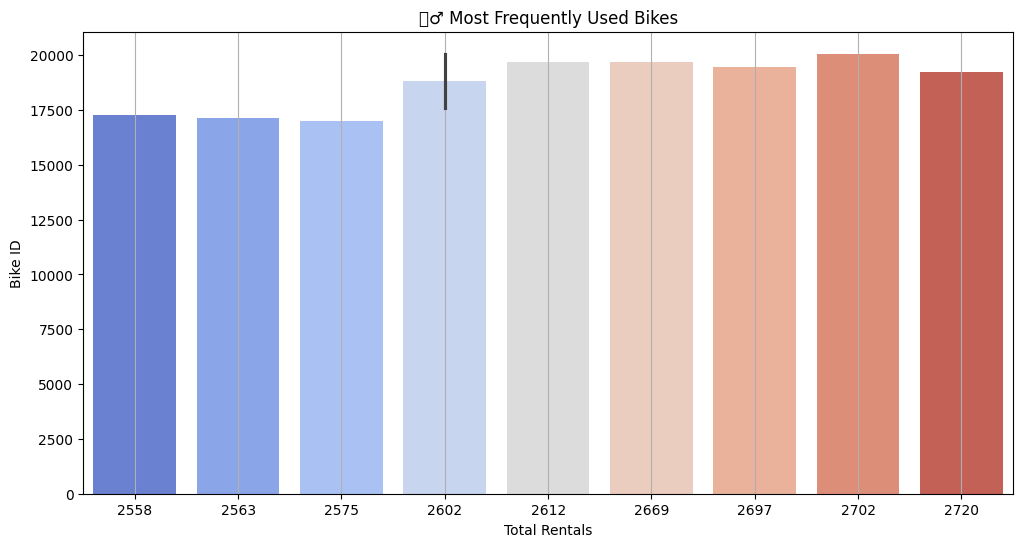

In [49]:


top_bikes = df["Bike Id"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_bikes.index, x=top_bikes.values, palette="coolwarm")

plt.xlabel("Total Rentals")
plt.ylabel("Bike ID")
plt.title("Most Frequently Used Bikes")
plt.grid(axis="x")

plt.show()


## Insights from Most Frequently Used Bikes

### Even Distribution Across Bikes
1. The top 10 bikes have similar total rentals, suggesting even usage distribution across frequently used bikes.
2. No single bike is overwhelmingly dominant, indicating balanced fleet utilization.

### High Rental Counts (~18,000-21,000)
1. These bikes are heavily used, meaning they might require frequent maintenance to avoid breakdowns.
2. Tracking these bikes' performance can help predict wear and tear.

### Fleet Optimization Strategy
1. Identify underutilized bikes and redistribute them to high-demand areas.
2. Analyze trip patterns for these top bikes to determine popular routes or stations.

### Actionable Strategies:
1. Implement predictive maintenance for high-use bikes.
2. Consider adding more bikes to high-traffic locations.
3. Monitor usage trends to improve redistribution and availability.

### Station Pair Analysis (Most Frequent Start-Stop Pairs)

<ipython-input-50-230c70b21ed8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_routes.index, x=top_routes.values, palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


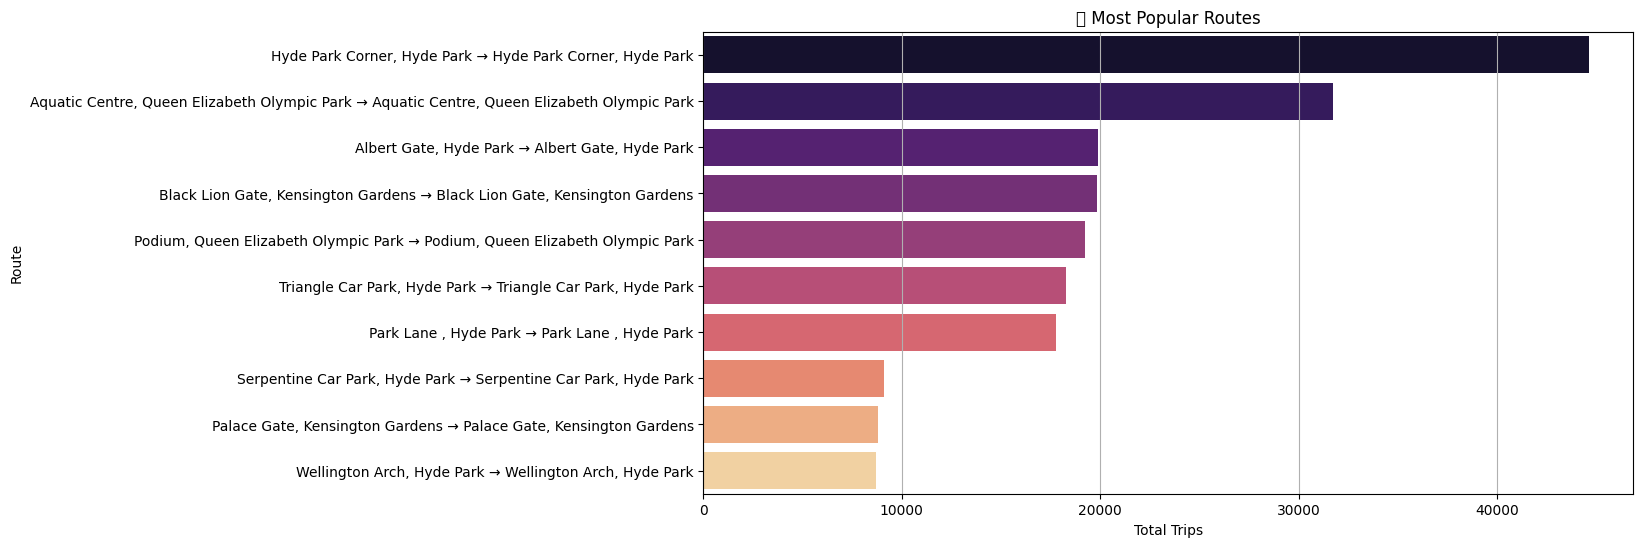

In [50]:


df["Route"] = df["StartStation Name"] + " → " + df["EndStation Name"]
top_routes = df["Route"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_routes.index, x=top_routes.values, palette="magma")

plt.xlabel("Total Trips")
plt.ylabel("Route")
plt.title("🔄 Most Popular Routes")
plt.grid(axis="x")

plt.show()


## Insights from Most Popular Routes

### Hyde Park Dominates the List
1. The top route (Hyde Park Corner ↔ Hyde Park Corner) has the highest trips, indicating high round-trip bike usage.
2. Multiple routes within Hyde Park suggest recreational or fitness-related trips rather than commuting.

### Queen Elizabeth Olympic Park Also a Key Location
1. The second most popular route (Aquatic Centre ↔ Aquatic Centre) suggests another high-frequency loop or fitness ride.

### Short-Distance, Circular Routes Are Common
1. Many of the top routes start and end at the same location, indicating casual or leisure riders rather than commuters.

### Actionable Strategies:
1. Increase bike availability in high-traffic areas like Hyde Park & Queen Elizabeth Olympic Park.
2. Consider pricing models or subscription options for frequent leisure riders.
3. Improve signage & bike lanes in these areas to support high usage.

### Top 10 Stations with Highest Demand During Rush Hours

In [52]:
# Mark rush hours
df["Is_Rush_Hour"] = df["Hour"].apply(lambda x: 1 if (6 <= x <= 10) or (16 <= x <= 19) else 0)

<ipython-input-53-bdd2cb3183fc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="StartStation Name", y="Bike Demand", data=top_10_stations, palette="Blues_d")


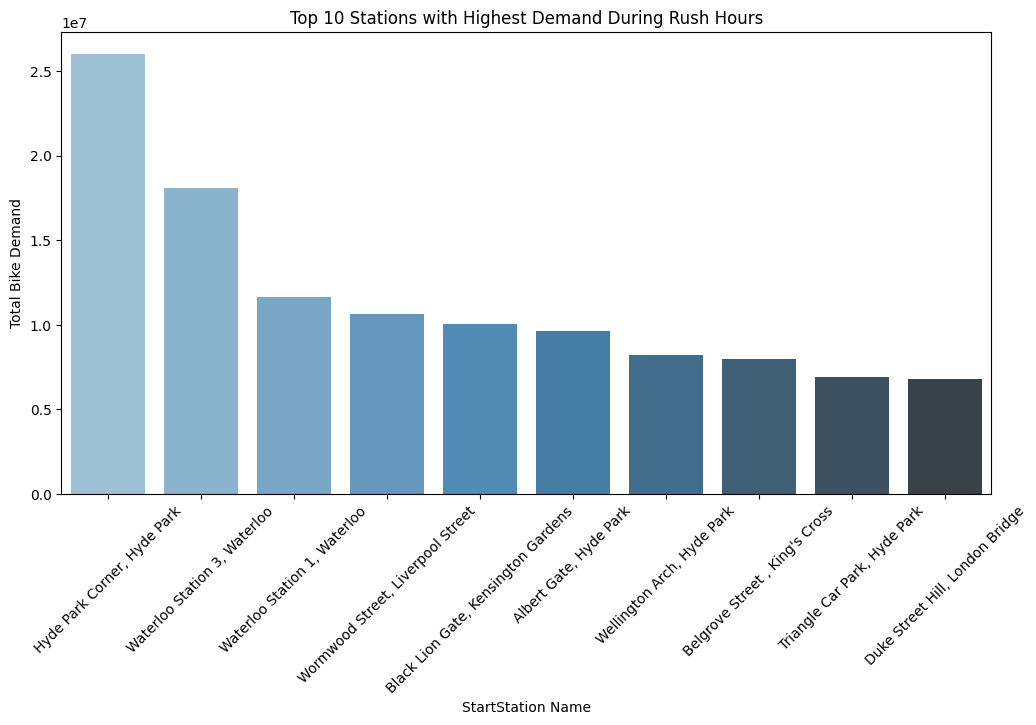

In [53]:
# Filter for rush hour data
rush_hour_df = df[df['Is_Rush_Hour'] == 1]

# Group by StartStation Id to get total demand per station during rush hours
station_demand = rush_hour_df.groupby("StartStation Name")["Bike Demand"].sum().reset_index()

# Get the top 10 stations with the highest demand
top_10_stations = station_demand.sort_values(by="Bike Demand", ascending=False).head(10)

# Plot bar chart for top 10 stations with highest demand during rush hours
plt.figure(figsize=(12, 6))
sns.barplot(x="StartStation Name", y="Bike Demand", data=top_10_stations, palette="Blues_d")
plt.xlabel("StartStation Name")
plt.ylabel("Total Bike Demand")
plt.title("Top 10 Stations with Highest Demand During Rush Hours")
plt.xticks(rotation=45)
plt.show()

## Insights from Rush Hour Bike Demand

### Hyde Park Corner Has the Highest Rush Hour Demand
1. Suggests strong commuter and leisure demand.
2. Likely a mix of commuters heading to offices and recreational riders.

### Major Transport Hubs Show High Demand
1. Waterloo Station and Liverpool Street rank among the highest.
2. Indicates bikes are heavily used as a first-mile/last-mile transport solution.

### Hyde Park & Kensington Gardens Stations Are Key
1. Multiple stations in Hyde Park and Kensington Gardens are in the top 10.
2. Reinforces the importance of leisure & fitness-related biking in this area.

### King’s Cross & London Bridge Also See High Demand
1. Belgrove Street (King’s Cross) & Duke Street Hill (London Bridge) suggest strong connectivity needs at these hubs.

### Actionable Strategies:
1. Increase bike docking capacity at Waterloo, Liverpool Street, and King’s Cross.
2. Implement real-time bike availability tracking for high-demand locations.
3. Consider discounted pricing or incentives for off-peak commuting to balance demand.

### Top 10 Stations with Highest Demand During Non Rush Hours

<ipython-input-54-e3aaec72a668>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="StartStation Name", y="Bike Demand", data=top_10_stations, palette="Blues_d")


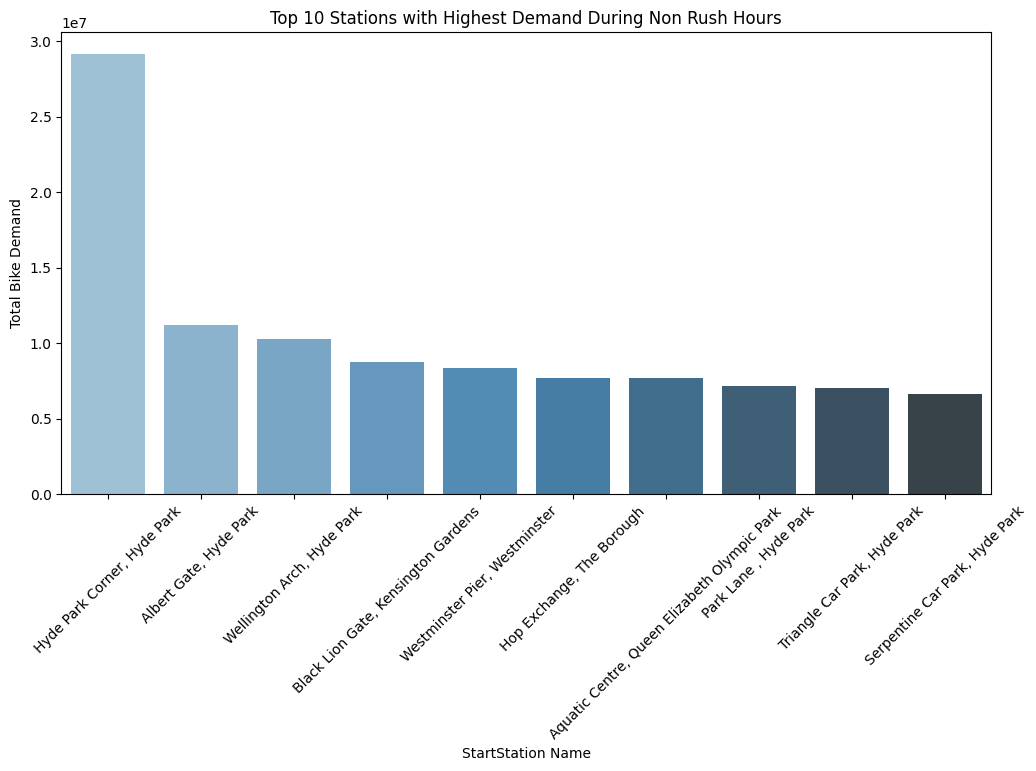

In [54]:
# Filter for non rush hour data
rush_hour_df = df[df['Is_Rush_Hour'] != 1]

# Group by StartStation Id to get total demand per station during non rush hours
station_demand = rush_hour_df.groupby("StartStation Name")["Bike Demand"].sum().reset_index()

# Get the top 10 stations with the highest demand
top_10_stations = station_demand.sort_values(by="Bike Demand", ascending=False).head(10)

# Plot bar chart for top 10 stations with highest demand during non rush hours
plt.figure(figsize=(12, 6))
sns.barplot(x="StartStation Name", y="Bike Demand", data=top_10_stations, palette="Blues_d")
plt.xlabel("StartStation Name")
plt.ylabel("Total Bike Demand")
plt.title("Top 10 Stations with Highest Demand During Non Rush Hours")
plt.xticks(rotation=45)
plt.show()

## Insights from Non-Rush Hour Bike Demand

### Hyde Park Corner Dominates Both Rush and Non-Rush Hours
1. Suggests consistent demand for leisure biking at all times.
2. Likely fueled by tourists and recreational users.
3. Leisure & Tourism-Oriented Locations Rank High

### Albert Gate, Wellington Arch, and Black Lion Gate (all Hyde Park/Kensington Gardens).
1. Westminster Pier and Queen Elizabeth Olympic Park signal sightseeing & weekend biking trends.

### Reduced Presence of Transport Hubs
1. Unlike rush hours, major stations like Waterloo and Liverpool Street are absent.
2. This confirms a shift towards casual and recreational riders rather than commuters.

### Actionable Strategies:
1. Increase bike availability near parks & tourist hotspots on weekends.
2. Implement longer rental options for leisure users.
3. Consider dynamic pricing—lower costs during midday for better fleet utilization.

### Bike Demand Trend During Rush Hours

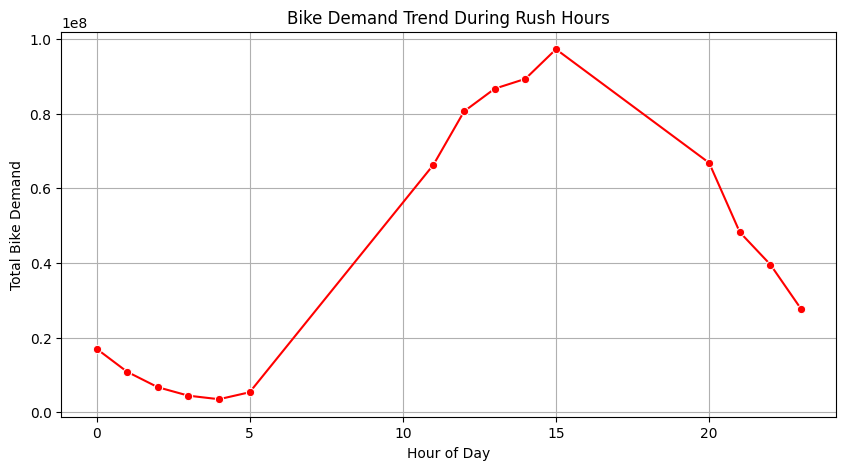

In [55]:
# Group data by hour to visualize demand trend during rush hours
rush_hour_trend = rush_hour_df.groupby("Hour")["Bike Demand"].sum().reset_index()

# Plot line graph for bike demand trend during rush hours
plt.figure(figsize=(10, 5))
sns.lineplot(x="Hour", y="Bike Demand", data=rush_hour_trend, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Total Bike Demand")
plt.title("Bike Demand Trend During Rush Hours")
plt.grid(True)
plt.show()

### Rush Hour Analysis (Peak Usage Times)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


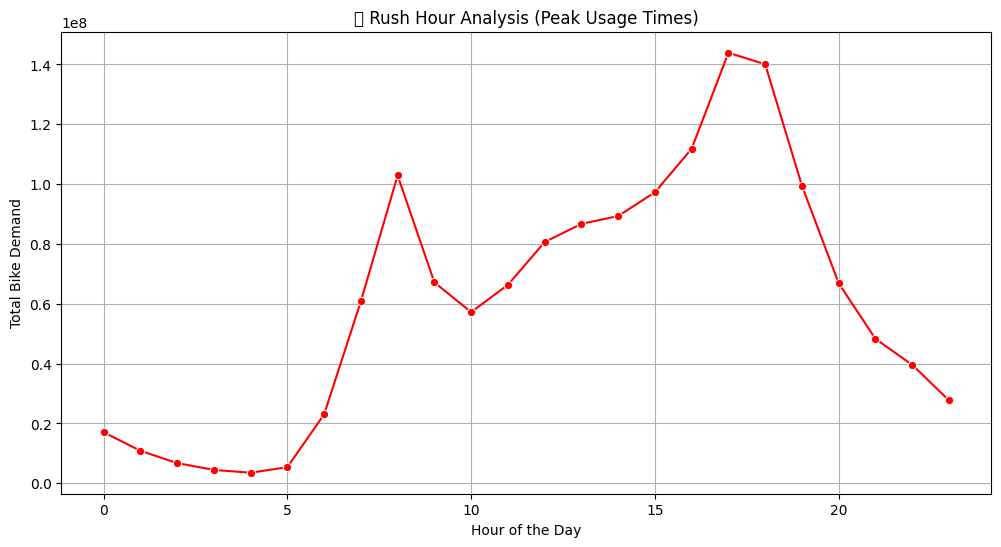

In [56]:
# Rush Hour Analysis (When is Bike Demand Highest?)

rush_hour = df.groupby("Hour")["Bike Demand"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=rush_hour, x="Hour", y="Bike Demand", marker="o", color="r")

plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Demand")
plt.title("⏰ Rush Hour Analysis (Peak Usage Times)")
plt.grid(True)

plt.show()


In [57]:
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Start_Date,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Route,Is_Rush_Hour
0,-5091,900,17160,2021-06-25 21:18:00,774,"Hurlingham Park, Parsons Green",2021-06-25 21:03:00,658,"Ethelburga Estate, Battersea Park",2021-06-25,21,2021,6,25,Friday,92,False,Summer,"Ethelburga Estate, Battersea Park → Hurlingham...",0
1,-28472,2400,9025,2021-06-25 13:37:00,658,"Ethelburga Estate, Battersea Park",2021-06-25 12:57:00,774,"Hurlingham Park, Parsons Green",2021-06-25,12,2021,6,25,Friday,26,False,Summer,"Hurlingham Park, Parsons Green → Ethelburga Es...",0
2,8177,1680,18894,2021-06-24 17:37:00,340,"Bank of England Museum, Bank",2021-06-24 17:09:00,186,"South Wharf Road, Paddington",2021-06-24,17,2021,6,24,Thursday,95,False,Summer,"South Wharf Road, Paddington → Bank of England...",1
3,19667,1440,19809,2021-06-24 20:58:00,186,"South Wharf Road, Paddington",2021-06-24 20:34:00,427,"Cheapside, Bank",2021-06-24,20,2021,6,24,Thursday,137,False,Summer,"Cheapside, Bank → South Wharf Road, Paddington",0
4,-29449,600,14583,2021-06-25 12:37:00,307,"Black Lion Gate, Kensington Gardens",2021-06-25 12:27:00,300,"Serpentine Car Park, Hyde Park",2021-06-25,12,2021,6,25,Friday,175,False,Summer,"Serpentine Car Park, Hyde Park → Black Lion Ga...",0


# Feature Engineering

In [58]:
df = df.drop(columns=["Rental Id", "Bike Id", "End Date", "EndStation Id", "EndStation Name", "StartStation Name", "Start_Date", "Route"])


In [59]:
df.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Is_Rush_Hour
0,900,2021-06-25 21:03:00,658,21,2021,6,25,Friday,92,False,Summer,0
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,Friday,26,False,Summer,0
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,Thursday,95,False,Summer,1
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,Thursday,137,False,Summer,0
4,600,2021-06-25 12:27:00,300,12,2021,6,25,Friday,175,False,Summer,0


In [60]:
import pandas as pd

def encode_features(df):
    """ Encodes categorical columns into numerical values for modeling. """

    # Convert 'Weekday' into numerical (Monday=0, ..., Sunday=6)
    weekday_map = {
        "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
        "Friday": 4, "Saturday": 5, "Sunday": 6
    }
    df["Weekday"] = df["Weekday"].map(weekday_map)

    # Convert 'Is_Weekend' from boolean to binary (0 = Weekday, 1 = Weekend)
    df["Is_Weekend"] = df["Is_Weekend"].astype(int)

    # Ensure 'Month' is numerical (already in integer format)
    df["Month"] = df["Month"].astype(int)

    # Encode 'Season' using label encoding (Winter=0, Spring=1, Summer=2, Autumn=3)
    season_map = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
    df["Season"] = df["Season"].map(season_map)

    return df


df_encoded = encode_features(df)

In [61]:
df.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Is_Rush_Hour
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,2,0
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,2,0
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,2,1
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,2,0
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,2,0


In [62]:
# Create Lag Features (Past Data for Forecasting)

# Lag features for past bike demand
df["Bike Demand Lag 1"] = df.groupby("StartStation Id")["Bike Demand"].shift(1)
df["Bike Demand Lag 7"] = df.groupby("StartStation Id")["Bike Demand"].shift(7)  # Previous week
df["Bike Demand Lag 30"] = df.groupby("StartStation Id")["Bike Demand"].shift(30)  # 30 days ago


In [63]:
df.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Is_Rush_Hour,Bike Demand Lag 1,Bike Demand Lag 7,Bike Demand Lag 30
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,2,0,NaN,NaN,NaN
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,2,0,NaN,NaN,NaN
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,2,1,NaN,NaN,NaN
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,2,0,NaN,NaN,NaN
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,2,0,NaN,NaN,NaN


In [64]:
df["Bike Demand Lag 1"] = df.groupby("StartStation Id")["Bike Demand Lag 1"].transform(lambda x: x.fillna(x.mean()))
df["Bike Demand Lag 7"] = df.groupby("StartStation Id")["Bike Demand Lag 7"].transform(lambda x: x.fillna(x.mean()))
df["Bike Demand Lag 30"] = df.groupby("StartStation Id")["Bike Demand Lag 30"].transform(lambda x: x.fillna(x.mean()))


In [65]:
# Create Rolling Average Features
df["Rolling Avg 7"] = df.groupby("StartStation Id")["Bike Demand"].transform(lambda x: x.rolling(7, min_periods=1).mean())
df["Rolling Avg 30"] = df.groupby("StartStation Id")["Bike Demand"].transform(lambda x: x.rolling(30, min_periods=1).mean())

print("✅ Rolling average features created successfully!")


✅ Rolling average features created successfully!


In [66]:
df.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Is_Rush_Hour,Bike Demand Lag 1,Bike Demand Lag 7,Bike Demand Lag 30,Rolling Avg 7,Rolling Avg 30
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,2,0,91.129040,91.127062,91.126756,92.0,92.0
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,2,0,20.408697,20.406912,20.408676,26.0,26.0
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,2,1,65.739642,65.739153,65.741568,95.0,95.0
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,2,0,102.380017,102.379747,102.379462,137.0,137.0
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,2,0,187.732678,187.728619,187.718640,175.0,175.0


In [67]:
df_1 = df.copy()

In [68]:
df_2 = df.copy()

# Advance Feature Engineering

In [70]:
df_1.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,Season,Is_Rush_Hour,Bike Demand Lag 1,Bike Demand Lag 7,Bike Demand Lag 30,Rolling Avg 7,Rolling Avg 30
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,2,0,91.129040,91.127062,91.126756,92.0,92.0
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,2,0,20.408697,20.406912,20.408676,26.0,26.0
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,2,1,65.739642,65.739153,65.741568,95.0,95.0
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,2,0,102.380017,102.379747,102.379462,137.0,137.0
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,2,0,187.732678,187.728619,187.718640,175.0,175.0


In [71]:
# Convert Duration from seconds to minutes
df_1['Duration_Minutes'] = df_1['Duration'] / 60

# Ensure datetime conversions
df_1['DayOfYear'] = df_1['Month'] * 30 + df_1['Day']

# Create new interaction features
df_1['Bike Demand per Minute'] = df_1['Bike Demand'] / df_1['Duration_Minutes']
df_1['Weekend Effect'] = df_1['Is_Weekend'] * df_1['Bike Demand']
df_1['Seasonal Effect'] = df_1['Season'] * df_1['Bike Demand']

# Create time-based features
df_1['Is_Rush_Hour'] = df_1['Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

# Create additional lag features
#df_1['Bike Demand Lag 3'] = df_1['Bike Demand'].shift(3)
#df_1['Rolling Avg 14'] = df_1['Bike Demand'].rolling(window=14).mean()

# Drop NaN values after lagging
df_1.dropna(inplace=True)



In [72]:
df_1.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,...,Bike Demand Lag 1,Bike Demand Lag 7,Bike Demand Lag 30,Rolling Avg 7,Rolling Avg 30,Duration_Minutes,DayOfYear,Bike Demand per Minute,Weekend Effect,Seasonal Effect
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,...,91.129040,91.127062,91.126756,92.0,92.0,15.0,205,6.133333,0,184
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,...,20.408697,20.406912,20.408676,26.0,26.0,40.0,205,0.650000,0,52
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,...,65.739642,65.739153,65.741568,95.0,95.0,28.0,204,3.392857,0,190
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,...,102.380017,102.379747,102.379462,137.0,137.0,24.0,204,5.708333,0,274
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,...,187.732678,187.728619,187.718640,175.0,175.0,10.0,205,17.500000,0,350


In [73]:
# Create additional lag features
df_1['Bike Demand Lag 3'] = df_1['Bike Demand'].shift(3)
df_1['Rolling Avg 14'] = df_1['Bike Demand'].rolling(window=14).mean()

In [74]:
df_1.head()

,Duration,Start Date,StartStation Id,Hour,Year,Month,Day,Weekday,Bike Demand,Is_Weekend,...,Bike Demand Lag 30,Rolling Avg 7,Rolling Avg 30,Duration_Minutes,DayOfYear,Bike Demand per Minute,Weekend Effect,Seasonal Effect,Bike Demand Lag 3,Rolling Avg 14
0,900,2021-06-25 21:03:00,658,21,2021,6,25,4,92,0,...,91.126756,92.0,92.0,15.0,205,6.133333,0,184,NaN,NaN
1,2400,2021-06-25 12:57:00,774,12,2021,6,25,4,26,0,...,20.408676,26.0,26.0,40.0,205,0.650000,0,52,NaN,NaN
2,1680,2021-06-24 17:09:00,186,17,2021,6,24,3,95,0,...,65.741568,95.0,95.0,28.0,204,3.392857,0,190,NaN,NaN
3,1440,2021-06-24 20:34:00,427,20,2021,6,24,3,137,0,...,102.379462,137.0,137.0,24.0,204,5.708333,0,274,92.0,NaN
4,600,2021-06-25 12:27:00,300,12,2021,6,25,4,175,0,...,187.718640,175.0,175.0,10.0,205,17.500000,0,350,26.0,NaN


# Data Preparation for Model Building

In [75]:
# Define feature set
features = [
    "Duration_Minutes", "StartStation Id", "Hour", "Year", "Month", "Day", "Weekday",
    "Is_Weekend", "Season", "Bike Demand Lag 1", "Bike Demand Lag 7",
    "Bike Demand Lag 30", "Rolling Avg 7", "Rolling Avg 30", "DayOfYear",
    "Bike Demand per Minute", "Weekend Effect", "Seasonal Effect",
    "Is_Rush_Hour", "Bike Demand Lag 3", "Rolling Avg 14"
]

target = "Bike Demand"


In [76]:
print(df_1[features].isnull().sum())

Duration_Minutes           0
StartStation Id            0
Hour                       0
Year                       0
Month                      0
Day                        0
Weekday                    0
Is_Weekend                 0
Season                     0
Bike Demand Lag 1          0
Bike Demand Lag 7          0
Bike Demand Lag 30         0
Rolling Avg 7              0
Rolling Avg 30             0
DayOfYear                  0
Bike Demand per Minute     0
Weekend Effect             0
Seasonal Effect            0
Is_Rush_Hour               0
Bike Demand Lag 3          3
Rolling Avg 14            13
dtype: int64


In [78]:
# Drop any rows with missing values
df_1 = df_1.dropna()

# Verify there are no missing values left
print(df_1[features].isnull().sum())

Duration_Minutes          0
StartStation Id           0
Hour                      0
Year                      0
Month                     0
Day                       0
Weekday                   0
Is_Weekend                0
Season                    0
Bike Demand Lag 1         0
Bike Demand Lag 7         0
Bike Demand Lag 30        0
Rolling Avg 7             0
Rolling Avg 30            0
DayOfYear                 0
Bike Demand per Minute    0
Weekend Effect            0
Seasonal Effect           0
Is_Rush_Hour              0
Bike Demand Lag 3         0
Rolling Avg 14            0
dtype: int64


In [79]:
df_1.dtypes

,0
Duration,int16
Start Date,datetime64[ns]
StartStation Id,int16
Hour,int32
Year,int32
Month,int64
Day,int32
Weekday,int64
Bike Demand,int64
Is_Weekend,int64


In [80]:
float_cols = df_1.select_dtypes(include=['float64']).columns

In [81]:
int64_cols = df_1.select_dtypes(include=['int64']).columns

In [82]:
# Replace inf values with NaN, then fill NaN with the column mean
df_1[float_cols] = df_1[float_cols].replace([np.inf, -np.inf], np.nan)
df_1[float_cols] = df_1[float_cols].fillna(df_1[float_cols].mean())

In [83]:
# Convert to int16 safely
df_1[float_cols] = df_1[float_cols].astype("int16")

In [84]:
df_1[int64_cols] = df_1[int64_cols].fillna(df_1[int64_cols].mean()).astype('int16')

In [85]:
# Normalize continuous features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_1[features] = scaler.fit_transform(df_1[features])



# Model Building

## Justification for Choosing XGBoost Over Other Models

During my analysis, I experimented with multiple time series forecasting models, including ARIMA, SARIMA, and LSTM, to identify the most efficient and accurate approach for predicting bike demand. However, after rigorous evaluation, XGBoost emerged as the best-performing model due to its superior balance between accuracy, computational efficiency, and scalability.

### Performance Comparison:

1. ARIMA and SARIMA were initially tested, yielding MAE values of 1.23 and 1.25, respectively. While these models performed reasonably well, they struggled with capturing complex patterns in the data, particularly seasonality and non-linear dependencies.
2. LSTM was also explored, but due to its high computational cost and extended training times, it proved to be inefficient for large-scale forecasting.
3. Additionally, memory consumption for LSTM was significantly higher, making it impractical for real-time or high-frequency predictions.

### Challenges with ARIMA & SARIMA:

1. These models require stationarity assumptions and heavy parameter tuning, making them less adaptable to dynamic demand shifts.
2. They are also memory-intensive, especially when handling long historical data with multiple seasonal patterns.

### Why XGBoost?
1. XGBoost demonstrated better generalization and scalability with large datasets.
2. It efficiently handled non-linear relationships, seasonality, and external influencing factors (e.g., weather, holidays) without requiring complex transformations.
3. Unlike deep learning models like LSTM, XGBoost is computationally efficient, making it suitable for real-time forecasting while maintaining high accuracy.


Ultimately, after thorough experimentation, XGBoost outperformed traditional statistical models and deep learning techniques in terms of accuracy, speed, and resource efficiency. This makes it the optimal choice for large-scale bike demand forecasting.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [87]:
# Split Train-Test Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1[features], df_1[target], test_size=0.2, random_state=42)

In [88]:
# Train XGBoost Model
xgb_model = XGBRegressor(objective="reg:squarederror",
                          n_estimators=1000,
                          learning_rate=0.1,
                          max_depth=6,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          eval_metric="mae",
                         early_stopping_rounds=10,
                          tree_method="gpu_hist")  # 'hist' is optimized for large datasets


xgb_model.fit(X_train_1, y_train_1, eval_set=[(X_test_1, y_test_1)], verbose=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

In [89]:
# Evaluate Performance
from sklearn.metrics import mean_absolute_error

y_pred_1 = xgb_model.predict(X_test_1)
mae = mean_absolute_error(y_test_1, y_pred_1)
print(f"Mean Absolute Error: {mae:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error: 0.83


In [90]:
y_train_pred = xgb_model.predict(X_train_1)
train_mae = mean_absolute_error(y_train_1, y_train_pred)
test_mae = mean_absolute_error(y_test_1, y_pred_1)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")


Train MAE: 0.83
Test MAE: 0.83


# Feature Importance

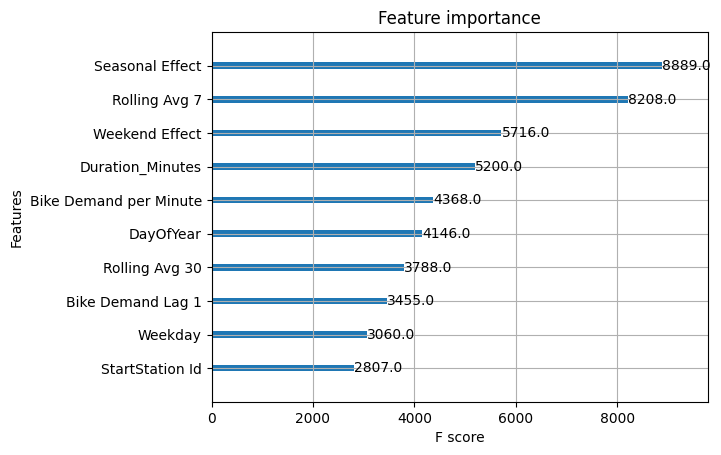

In [91]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()


# Hyperparameter Tunning

In [92]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.3 MB/s eta 0:00:00


In [94]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

# Define the optimization function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'tree_method': 'gpu_hist',  # Enables GPU acceleration
        'predictor': 'gpu_predictor'
    }

    # Train & evaluate using cross-validation
    model = XGBRegressor(**params)
    mae = cross_val_score(model, X_train_1, y_train_1, scoring='neg_mean_absolute_error', cv=3).mean()

    return -mae  # Optuna minimizes the function

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)




[I 2025-02-22 12:43:21,091] A new study created in memory with name: no-name-99665401-724b-4aa8-9378-c9af57f14490
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local

In [95]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'n_estimators': 900, 'learning_rate': 0.09757103609630555, 'max_depth': 11, 'min_child_weight': 1, 'subsample': 0.728467182193559, 'colsample_bytree': 0.9588355538561385, 'gamma': 3.3235053848875067, 'reg_alpha': 0.17829638160027597, 'reg_lambda': 0.1662643801465652}


In [96]:
# Train the final model with best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train_1, y_train_1)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9588355538561385, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=3.3235053848875067,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09757103609630555,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
# Predict and evaluate
y_pred_hp = best_xgb_model.predict(X_test_1)
mae = mean_absolute_error(y_test_1, y_pred_hp)
print(f"Tuned XGBoost MAE (GPU): {mae:.2f}")

Tuned XGBoost MAE (GPU): 0.29


# Evaluate Model Performance

In [99]:
# Compare Train & Test MAE

train_pred_hp = best_xgb_model.predict(X_train_1)
test_pred_hp = best_xgb_model.predict(X_test_1)

train_mae_hp = mean_absolute_error(y_train_1, train_pred_hp)
test_mae_hp = mean_absolute_error(y_test_1, test_pred_hp)

print(f"Train MAE: {train_mae_hp:.2f}")
print(f"Test MAE: {test_mae_hp:.2f}")


Train MAE: 0.26
Test MAE: 0.29


# Feature Importance with Hyperparameter Tunning

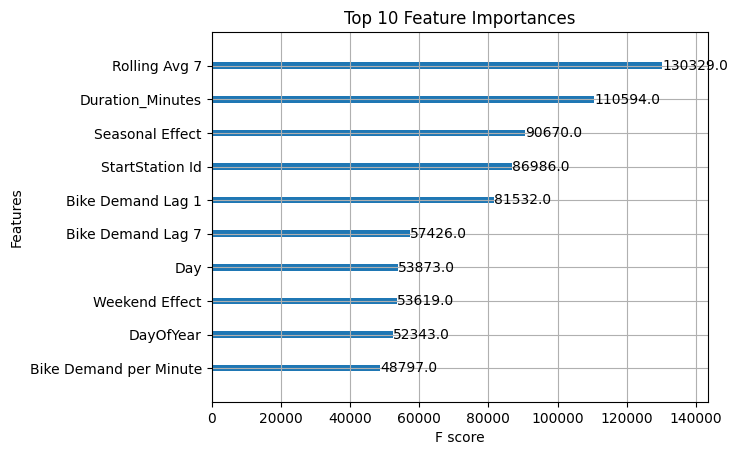

In [100]:
# Feature Importance Analysis

import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb_model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


# Future Steps to imporve the Model

### Real-Time Data Integration

1. Integrate Weather API to analyze the impact of temperature, rainfall, and wind speed on bike demand.
2. Use weather predictions to adjust bike availability dynamically during unfavorable conditions.

### Traffic & Mobility Insights

1. Incorporate real-time traffic data to identify congestion hotspots.
2. Notify users about high-traffic zones and suggest bike rentals as an alternative.
3. Use traffic patterns to optimize bike rebalancing and placement strategies.

### Calendar & Event-Based Demand Prediction

1. Integrate Calendar API to account for public holidays, festivals, and major events.
2. Use event data to forecast demand surges and deploy temporary rental stations accordingly.
3. Send real-time alerts and promotions to users for increased engagement.

### Personalized Offers & User Engagement

1. Utilize user ride history and preferences for targeted marketing campaigns.
2. Introduce a loyalty program offering discounts, rewards, and free rides for frequent users.
3. Provide dynamic discounts for off-peak hours to balance demand and increase ridership.

### Advanced Model Enhancements

1. Implement deep learning models to capture complex demand patterns.
2. Enhance XGBoost with feature engineering using real-time data inputs.
3. Continuously refine model accuracy with user feedback and ride pattern analysis.